### Data Preprocessing

In [8]:
import cv2
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [3]:
img_rows , img_cols = 112 , 112

In [4]:
import os

In [5]:
data_dir = os.listdir('Dataset')

In [6]:
data_dir

['without_mask', 'with_mask']

In [7]:
images = []
labels = []

In [8]:
for category in data_dir:
    folder_path = os.path.join('Dataset' , category)
    
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path , img)
        img = cv2.imread(img_path)
        
        try:
            #converting grayscale image
            grayscale_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
            
            # resize grayscale image to our defined rows and cols
            resized_img = cv2.resize(grayscale_img , (img_rows , img_cols))
            
            images.append(resized_img)
            labels.append(category)
        
        except Exception as e:
            
            print('Exception :' , e)

In [9]:
len(images)

781

In [10]:
len(labels)

781

In [11]:
import numpy as np

In [12]:
images = np.array(images)/255.0
images = np.reshape(images , (images.shape[0] , img_rows , img_cols , 1))

In [13]:
print(images.shape) # image data is now ready.

(781, 112, 112, 1)


In [14]:
# now we have to encode the labels

In [15]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)


In [16]:
labels = to_categorical(labels)


In [17]:
labels = np.array(labels)
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### CNN Model Creation

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [19]:
model = Sequential()

# First layer
model.add(Conv2D(32 , (3,3) , input_shape=(img_rows, img_cols , 1) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Second layer
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Third Layer
model.add(Flatten())
model.add(Dropout(0.5))

#Fourth Layer
model.add(Dense(64 , activation='relu'))
model.add(Dense(2 , activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dropout (Dropout)            (None, 43264)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [21]:
model.compile(optimizer='adam'  , loss='categorical_crossentropy' , metrics=['accuracy'])

In [22]:
X_train , X_test , y_train , y_test = train_test_split(images , labels , test_size = 0.25 , random_state = 0)

In [23]:
history = model.fit(X_train , y_train , epochs=6 , validation_split=0.2)

Train on 468 samples, validate on 117 samples
Epoch 1/5
468/468 [==============================] - 4s 9ms/sample - loss: 0.8842 - accuracy: 0.5043 - val_loss: 0.6953 - val_accuracy: 0.4957
Epoch 2/5
468/468 [==============================] - 5s 10ms/sample - loss: 0.6927 - accuracy: 0.5064 - val_loss: 0.6914 - val_accuracy: 0.5128
Epoch 3/5
468/468 [==============================] - 5s 10ms/sample - loss: 0.6791 - accuracy: 0.5705 - val_loss: 0.6399 - val_accuracy: 0.8034
Epoch 4/5
468/468 [==============================] - 4s 9ms/sample - loss: 0.5895 - accuracy: 0.6923 - val_loss: 0.5752 - val_accuracy: 0.6154
Epoch 5/5
468/468 [==============================] - 5s 11ms/sample - loss: 0.4023 - accuracy: 0.8291 - val_loss: 0.3566 - val_accuracy: 0.8803


In [24]:
model.evaluate(X_test , y_test)

196/196 [==============================] - 1s 4ms/sample - loss: 0.3839 - accuracy: 0.8265


[0.38387257712227957, 0.82653064]

In [27]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# %matplotlib notebook



<IPython.core.display.Javascript object>


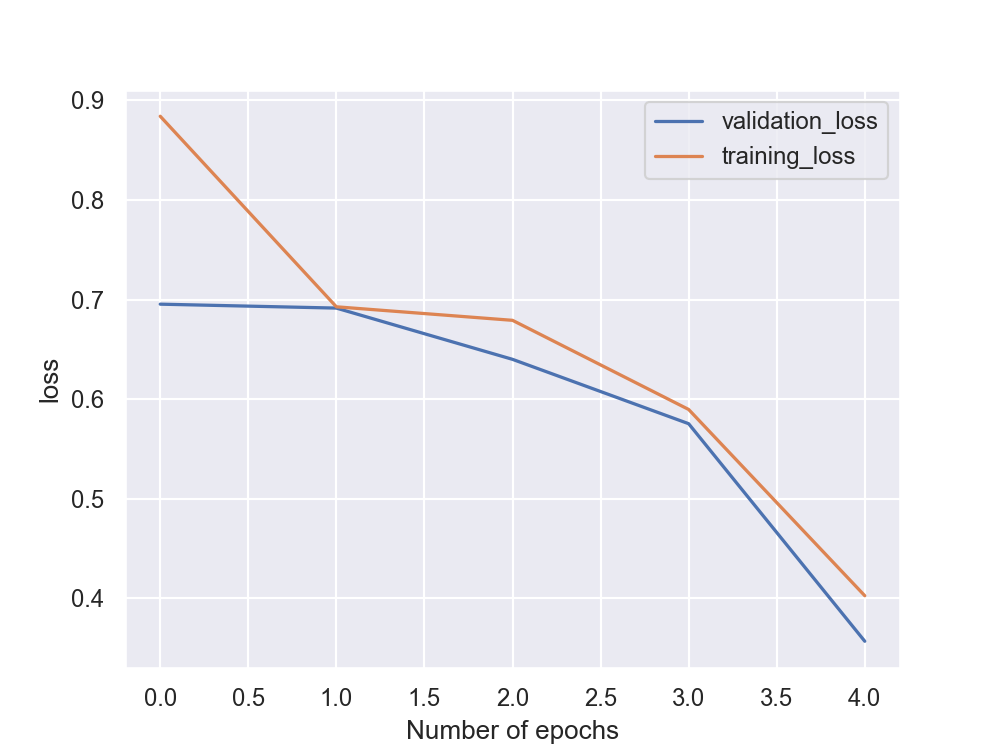

In [31]:
# plot loss

plt.plot(history.history['val_loss'] , label = 'validation_loss')
plt.plot(history.history['loss'] , label = 'training_loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


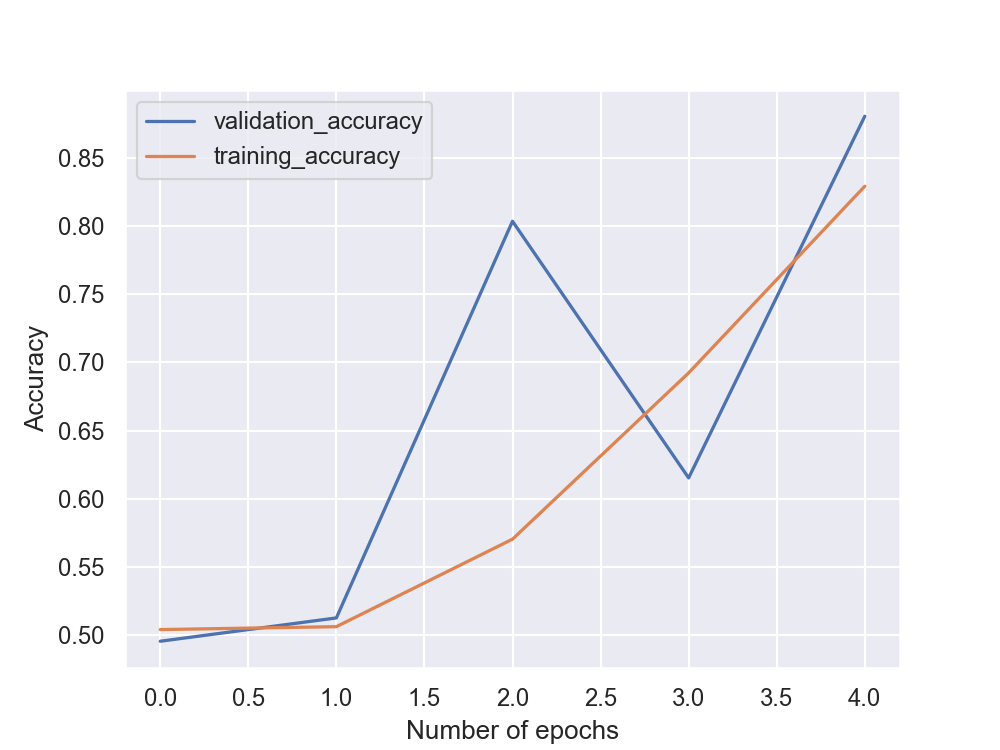

In [32]:
# plot Accuracy


plt.plot(history.history['val_accuracy'] , label = 'validation_accuracy')
plt.plot(history.history['accuracy'] , label = 'training_accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
model.save('Face_mask_detection.h5')

### Load Model

In [1]:
from tensorflow.keras.models import load_model

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
model = load_model('Face_mask_detection.h5')

<IPython.core.display.Javascript object>

In [4]:
import tkinter
import smtplib
from tkinter import messagebox
import cv2
import numpy as np

<IPython.core.display.Javascript object>

In [5]:
root = tkinter.Tk()
root.withdraw()

''

<IPython.core.display.Javascript object>

In [6]:
face_det_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

<IPython.core.display.Javascript object>

In [7]:
vid_source = cv2.VideoCapture(0)

<IPython.core.display.Javascript object>

In [8]:
text_dict = {0:'Mask ON' , 1:'NO Mask'}
rect_color_dict = {0:(0,255,0) , 1:(0,0,255)}

<IPython.core.display.Javascript object>

In [9]:
SUBJECT = "Access Denied"   
TEXT = "One Visitor violated Face Mask Policy. See in the camera to recognize user. A Person has been detected without a face mask in this area. Please Alert the authorities."


<IPython.core.display.Javascript object>

In [ ]:
while(True):

    ret, img = vid_source.read()
    grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_det_classifier.detectMultiScale(grayscale_img,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img = grayscale_img[y:y+w,x:x+w]
        resized_img = cv2.resize(face_img,(112,112))
        normalized_img = resized_img/255.0
        reshaped_img = np.reshape(normalized_img,(1,112,112,1))
        result=model.predict(reshaped_img)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),rect_color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),rect_color_dict[label],-1)
        cv2.putText(img, text_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2) 
        
        # If label = 1 then it means wearing No Mask and 0 means wearing Mask
        if (label == 1):
            # Throw a Warning Message to tell user to wear a mask if not wearing one. This will stay
            #open and No Access will be given He/She wears the mask
            messagebox.showwarning("Warning","Access Denied. Please wear a Face Mask")
            
            # Send an email to the administrator if access denied/user not wearing face mask 
            message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)
            mail = smtplib.SMTP('smtp.gmail.com', 587)
            mail.ehlo()
            mail.starttls()
             
            # when person not wear a mask information send to this particular image
            
            mail.login('your mail','your mail password') 
            mail.sendmail('mail','mail id password',message)
            mail.close
        else:
            pass
            break

    cv2.imshow('LIVE Video Feed',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()